<a href="https://colab.research.google.com/github/AnaGutson/Organizacion-de-datos/blob/main/Reducci%C3%B3n_de_la_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reducción de la dimensionalidad**

Visualización de datos en una **dimensión menor** ($2D$ o $3D$), **preservando características importantes** de estos como distancias, correlaciones, etc.

- Visualización de datos para **entender su distribución**.
  - Detección de patrones inherentes a simple vista.
- **Reducción del ruido**.
- **Aceleración de los tiempos de entrenamiento** de un modelo.
- Compresión de la información.
- Presentación de resultados a interesados (quienes no siempre conocen de ciencia de datos).


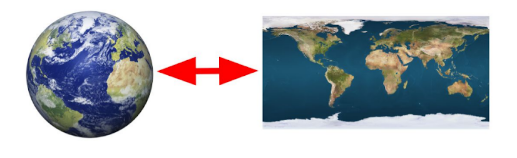

Hay varios **algoritmos** que resuelven este problema, con diversos usos, ventajas y debilidades:
- PCA.
- ISOMAP.
- LLE.
- Proyecciones aleatorias.
- MDS.
- t-SNE.
- LDA.
- UMAP.


## **Principal Component Analysis (PCA)**

Sirve para **identificar si hay agrupamiento de datos** en el espacio de entrada. 

Se pueden identificar correlaciones, clusters o bien entender cuán dispersos están los datos y sobre todo, sobre qué ejes o variables.

Es **útil** especialmente **cuando no se puede representar el espacio de entrada sobre un eje cartesiano**.


### **Pasos**


- Se calcula el promedio de cada variable.
- Se calcula la intersección de los promedios: el centro espacial de los datos.
- Se centran los datos a partir del nuevo centro espacial.
- Se busca la recta que mejor ajuste que pase por el eje de coordenadas: **PC1**.
- Se calculan las proporciones de cada eje: los **Loading Scores**.
- Se calculan el resto de rectas, teniendo en cuenta que deben:
  - Pasar por el origen.
  - Ser ortogonales a las demás rectas.
  - Tener el mejor ajuste, maximizando su autovector.
- Se calcula la variación de cada componente.
- Si hay componentes que aporten una cantidad significativa de información, se mantienen únicamente esos ejes y se disminuyen las dimensiones.
  Sino, se puede intentar detectar agrupamiento visualmente.
- Se rota el gráfico tal que quede **PC1** horizontal.
- Se utilizan los puntos proyectados en los ejes para reubicar los puntos.



### **Ejemplo (2D)**

Se quiere poder visualizar el siguiente dataset.

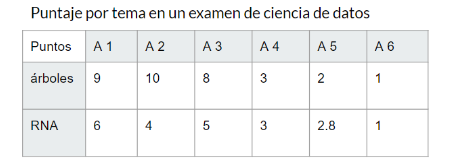

- Se calcula el promedio de la primera variable (árboles): $5.5$.
- Se calcula el promedio de la segunda variable (RNA): $3.63$.
- Se calcula la intersección de los promedios: el **centro espacial** de los datos.

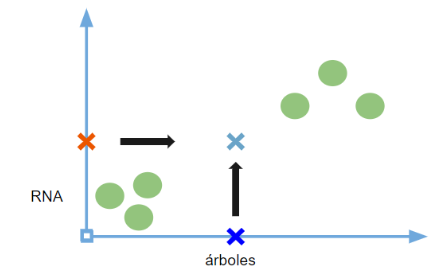

- Se centran los datos a partir del nuevo centro espacial.
- Se traza una línea aleatoria que pasa por el origen de coordenadas.
- Se rota la línea hasta que ajuste bien al conjunto de datos como en regresión lineal (cuadrados mínimos).


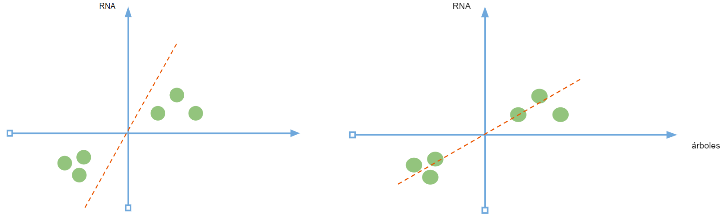

> Para hacer la rotación de la línea:
> - Se busca la proyección ortogonal de cada punto sobre la recta.
>
>  PCA lo que hace es **buscar la recta que mejor ajusta maximizando la suma de las distancias al cuadrado**, medidas desde los puntos proyectados sobre la recta hasta el origen de coordenadas, es decir: $c^2$.


> 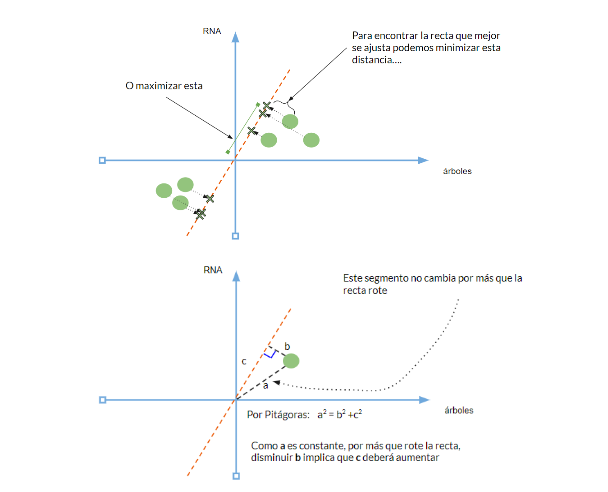

> - Se encuentran todas las distancias (los $c^2$) y se suman: ese es el valor que maximiza PCA.

> 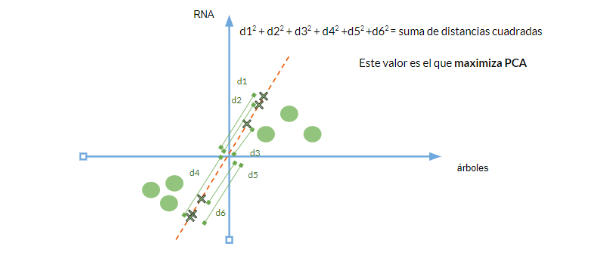

La línea ya rotada se conoce como **componente principal 1 o PC1**.
- Se calcula la pendiente de **PC1**: $4$.
  - Eso quiere decir que los datos están mucho más dispersos sobre el eje $x$ (árboles) que sobre el eje $y$ (RNA).

Como **PC1** es una mezcla de los ejes RNA y árboles (en una relación de $1$ árbol cada $4$ RNA), se la llama: **combinación lineal de variables**.
- Se calcula distancia $a =  4.12$.

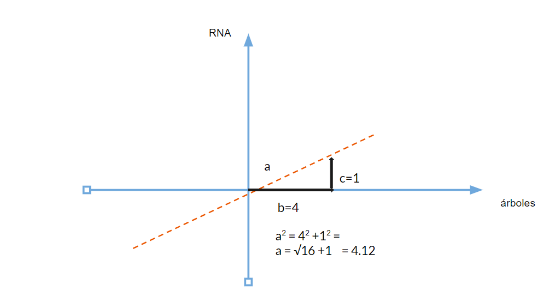

- En general se combina PCA con **SVD** (Singular Value Decomposition), con lo cual se escalan los valores para que $a = 1$.

  Las proporciones de cada eje (RNA y árboles) son llamadas **Loading Scores**.
  - $0.97$ árboles.
  - $0.241$ RNA.


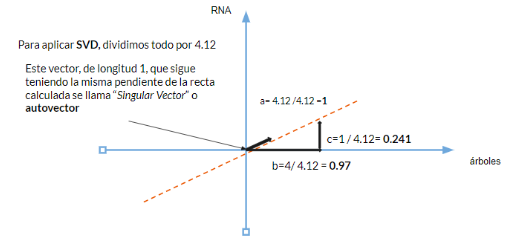

Las distancias al cuadrado que calculamos antes $(d_1^2 + d_2^2 + d_3^2 + d_4^2 + d_5^2 +d_6^2)$ se llaman **autovalores de PC1**.

- Se calcula **PC2: la recta ortogonal a PC1** (que pase por el origen).

  En este caso, como se está trabajando en $R^2$, hay una sola posibilidad.

  Su relación es de $-1$ árboles y $4$ RNA.

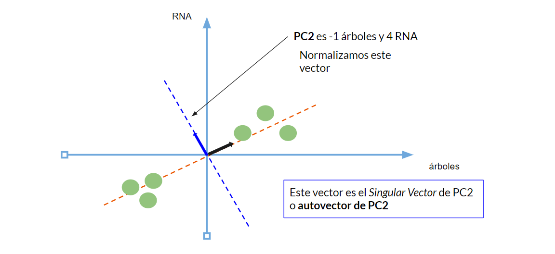

- Para graficar el gráfico final de PCA, se proyecta cada punto sobre las rectas **PC1** y **PC2**.


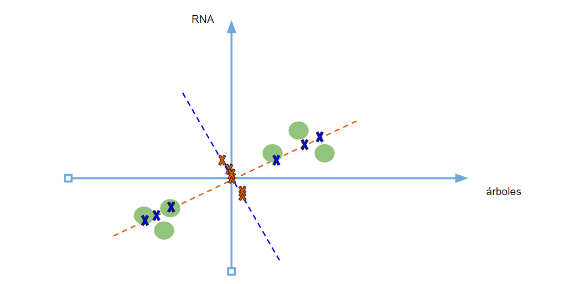

- Se rota el gráfico tal que quede **PC1** horizontal.
- Se utilizan los puntos proyectados en los ejes para reubicar los puntos.


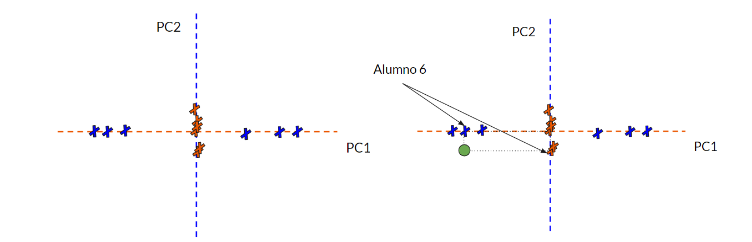

Se recuerda que:

$→$ Suma distancias cuadradas de **PC1** $=$ autovalor de **PC1**.

$→$ Suma distancias cuadradas de **PC2** $=$ autovalor de **PC2**.

- Se calcula la variación de cada componente.
  - $\frac{\textrm{suma distancias cuadradas de PC1}}{n-1} = \textrm{variacion de PC1}$
  - $\frac{\textrm{suma distancias cuadradas de PC2}}{n-1} = \textrm{variacion de PC2}$
- Se calcula la variación relativa de cada componente, es decir, el porcentaje de cada variación.
  Por ejemplo, si $ΔPC1 = 15$ y $ΔPC1 = 3$, entonces la variación de **PC1** es del $\frac{15}{15+3} \cdot 100\% = 83\%$, y de **PC2** es del $\frac{3}{15+3} \cdot 100\% = 17\%$. 

### **Ejemplo (3D)**

Se quiere poder visualizar el siguiente dataset.

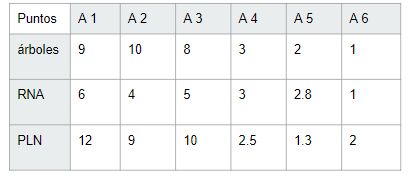

- Se calcula el promedio de la primera variable (árboles): $5.5$.
- Se calcula el promedio de la segunda variable (RNA): $3.63$.
- Se calcula el promedio de la tercera variable (PLN): $6.13$.
- Se calcula la intersección de los promedios: el **centro espacial** de los datos.
- Se centran los datos a partir del nuevo centro espacial.
- Se busca la recta que mejor ajuste que pase por el eje de coordenadas: **PC1**.

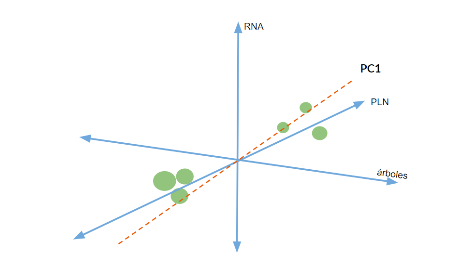

- Se calculan las proporciones de cada eje: los **Loading Scores**.
  - $0.62$ árboles.
  - $0.15$ RNA.
  - $0.77$ PLN.
- Se calcula **PC2**:
  - Pase por el origen.
  - Sea ortogonal a **PC1**.
  - Tenga el mejor ajuste, según se vio, maximizando su autovector.
- Finalmente, se calcula **PC3**:
  - Pase por el origen.
  - Sea ortogonal a **PC1** y **PC2**.


- Se calcula la variación de cada componente.
  - **PC1**: $79\%$.
  - **PC2**: $15\%$.
  - **PC3**: $6\%$.   

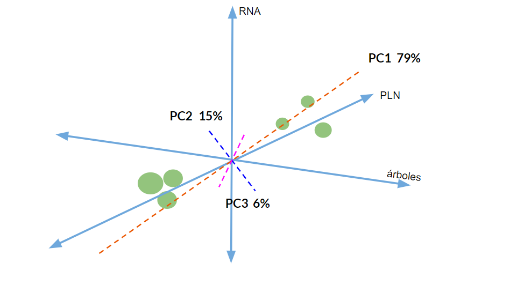

Se observa que los ejes que más dispersión aportan son **PC1** y **PC2**. Se mantienen únicamente esos ejes, dejando de lado **PC3**.

Se convierte en un gráfico de una dimensión menor ($2d$).

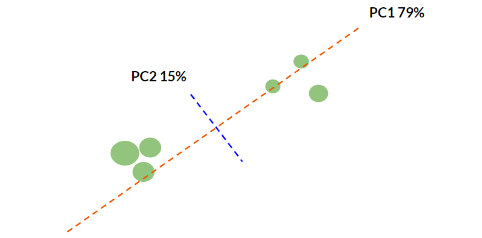

- Se rota el gráfico tal que quede **PC1** horizontal.
- Se utilizan los puntos proyectados en los ejes para reubicar los puntos.


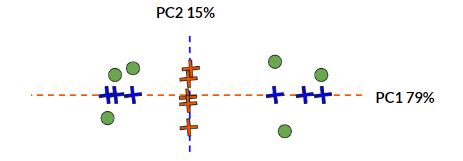